In [75]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel,read_csv, DataFrame
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [76]:
origin = read_csv("citrus.csv")
origin.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [77]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [78]:
origin.describe()
origin[['name']].value_counts()

name      
grapefruit    5000
orange        5000
Name: count, dtype: int64

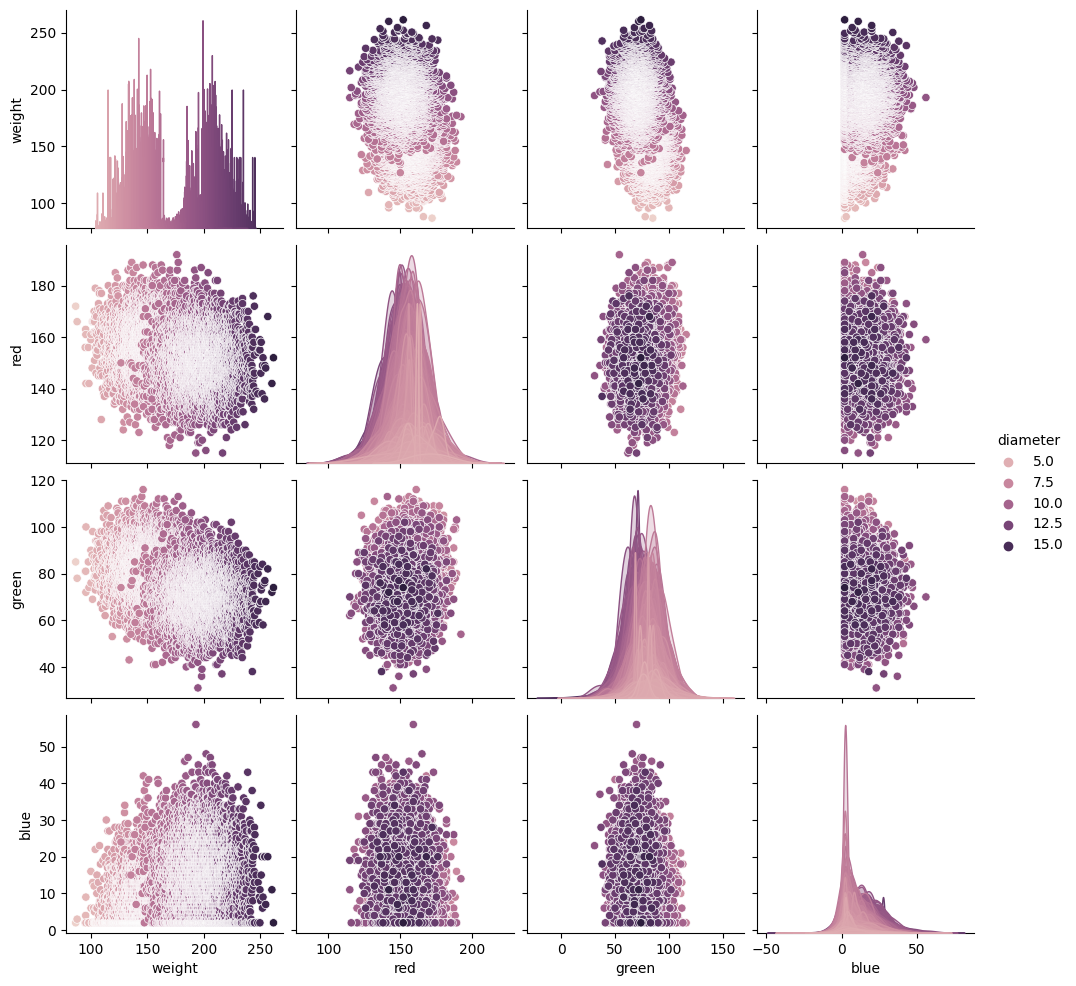

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(vars=["weight", "red", "green", 'blue'],
             hue="diameter", data=origin)
plt.show()

In [80]:
labels = {'orange': 0, 'grapefruit': 1}
labels

{'orange': 0, 'grapefruit': 1}

In [81]:
df = origin.copy()
df['name'] = df['name'].map(labels)
df.head()

,name,diameter,weight,red,green,blue
0,0,2.96,86.76,172,85,2
1,0,3.91,88.05,166,78,3
2,0,4.42,95.17,156,81,2
3,0,4.47,95.60,163,81,4
4,0,4.48,95.76,161,72,9


In [82]:
x = df.drop('name', axis=1)
x.head()
y = df['name']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: name, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(x, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [85]:
import numpy as np
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9480000000000001


In [86]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.41303525 0.34480904 0.04300222 0.1198733  0.07928018]


In [87]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.951375


In [88]:

from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9508750000000001


In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9594687499999999 0.947875


In [116]:
# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42, max_iter=300, min_samples_leaf=25, l2_regularization=1)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.98525


In [91]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.919

In [92]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300, random_state=777)
kmeans.fit(df)
labels = kmeans.predict(df)
labels

array([0, 0, 0, ..., 1, 1, 1])

In [93]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

for n in range(5, 50):
  # k - 최근접 이웃 개수 설정
  kn = KNeighborsClassifier(n_neighbors=n)
  kn.fit(train_input, train_target)
  # 점수 계산
  score = kn.score(train_input, train_target)
  # 100%의 정확도에 미치지 못하는 이웃 개수 출력
  if score > 0.9:
    print(n, score)
    break

5 0.935


In [94]:
kn = KNeighborsClassifier()
kn.fit(test_input, test_target)

for n in range(5, 50):
  # k - 최근접 이웃 개수 설정
  kn = KNeighborsClassifier(n_neighbors=n)
  kn.fit(test_input, test_target)
  # 점수 계산
  score = kn.score(test_input, test_target)
  # 100%의 정확도에 미치지 못하는 이웃 개수 출력
  if score > 0.9:
    print(n, score)
    break

5 0.9385


In [95]:
df.info()
df = df.drop('name', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  int64  
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 468.9 KB


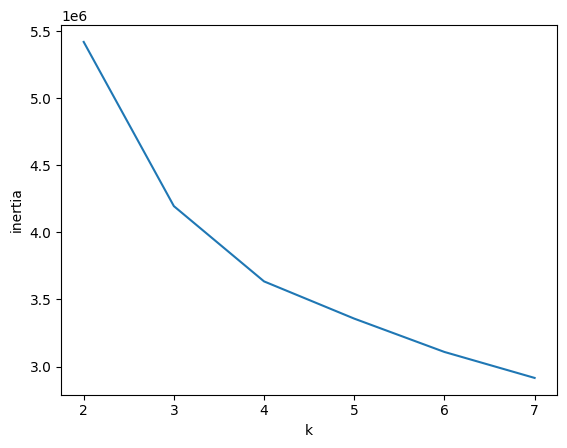

In [96]:
inertia = []
for k in range(2, 8):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(df)
  inertia.append(km.inertia_)

plt.plot(range(2,8), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [101]:
kmeans = KMeans(n_clusters=2, random_state=777)
kmeans.fit(df)
y_pred = kmeans.predict(df)
score = silhouette_score(df, y_pred)
print("실루엣 점수: {0:.3f}".format(score))

실루엣 점수: 0.434


In [98]:
score_list = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=777)
    kmeans.fit(df)
    y_pred = kmeans.predict(df)
    score = silhouette_score(df, y_pred)
    score_list.append(score)
score_list


[0.43423300966616163,
 0.30117606092794125,
 0.2383905171779411,
 0.20684439931525447,
 0.19266541352385025,
 0.18828130830243442,
 0.19033739776198844,
 0.18737442662940482,
 0.18460801198500845]

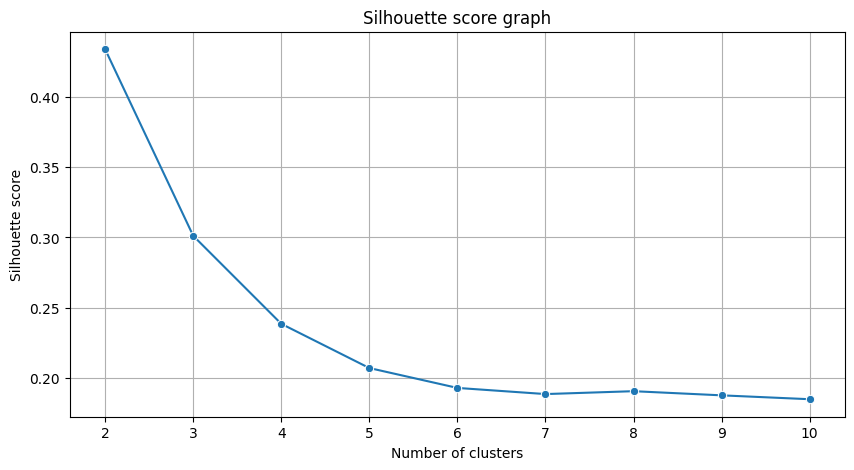

In [99]:
plt.figure(figsize=(10, 5))
sb.lineplot(x=range(2, 11), y=score_list, marker='o')
plt.title("Silhouette score graph")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()
plt.close()

In [100]:
kmeans = KMeans(n_clusters=2, random_state=777)
kmeans.fit(df)
y_pred = kmeans.predict(df)
y_pred

array([0, 0, 0, ..., 1, 1, 1])